In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")

In [32]:
df=pd.read_csv("insurance.csv")

In [33]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [35]:
df.shape

(1338, 7)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [37]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# EDA

<AxesSubplot:>

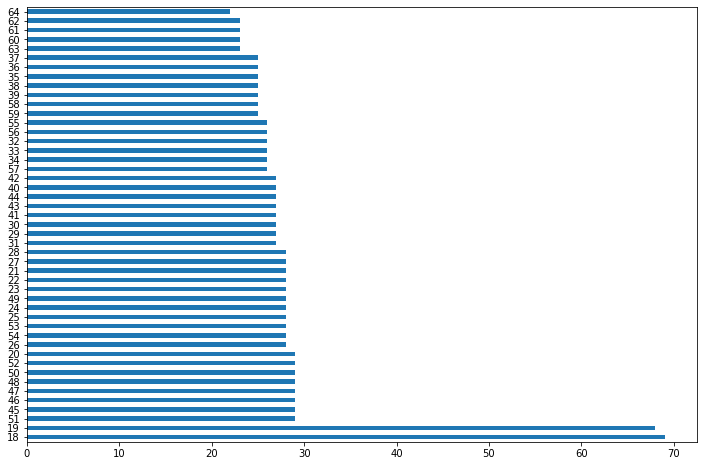

In [47]:
plt.figure(figsize=(12,8))
df.age.value_counts().plot(kind='barh')

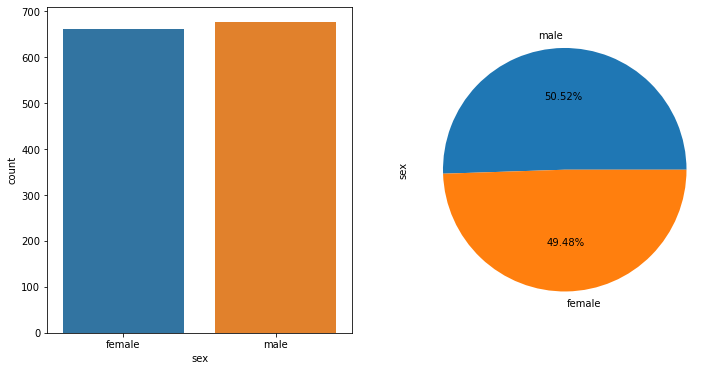

In [49]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(data=df,x=df.sex)
plt.subplot(1,2,2)

df.sex.value_counts().plot(kind='pie',autopct='%.2f%%')

plt.show()

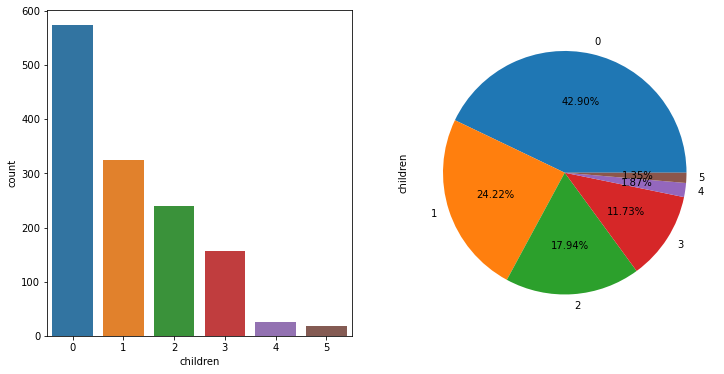

In [50]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(data=df,x=df.children)
plt.subplot(1,2,2)

df.children.value_counts().plot(kind='pie',autopct='%.2f%%')

plt.show()

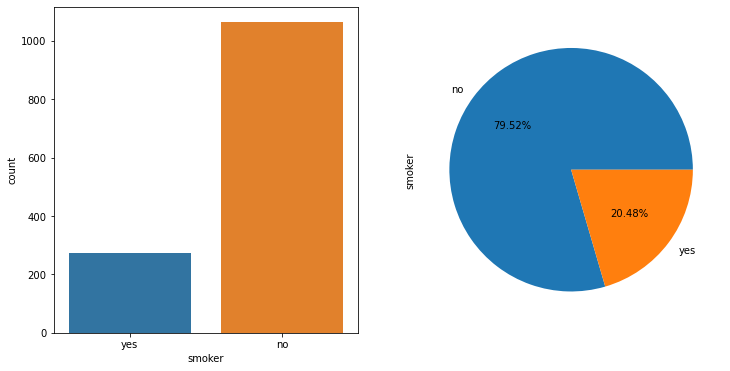

In [51]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(data=df,x=df.smoker)
plt.subplot(1,2,2)

df.smoker.value_counts().plot(kind='pie',autopct='%.2f%%')

plt.show()

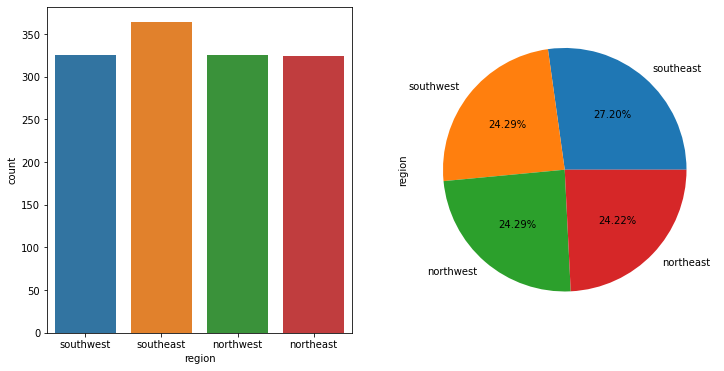

In [52]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(data=df,x=df.region)
plt.subplot(1,2,2)

df.region.value_counts().plot(kind='pie',autopct='%.2f%%')

plt.show()

<AxesSubplot:xlabel='sex', ylabel='count'>

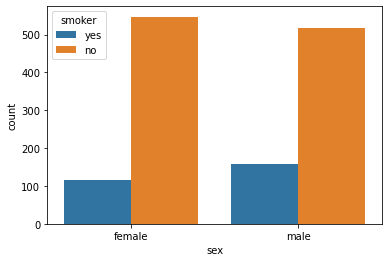

In [54]:
sns.countplot(data=df,x=df.sex,hue='smoker')

<AxesSubplot:>

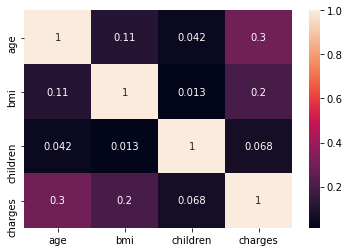

In [55]:
sns.heatmap(df.corr(),annot=True)

In [57]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [58]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [65]:
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['children']=le.fit_transform(df['children'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])

In [66]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [68]:
y=df['charges']
x=df.drop('charges',axis=1)

In [69]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [70]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [80]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pre=lr.predict(X_test)
print(r2_score(y_test,y_pre))

0.7602640802497019


In [85]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pre=dt.predict(X_test)
print(r2_score(y_test,y_pre))

0.7251227711840869


In [90]:
svr=SVR()
svr.fit(X_train,y_train)
y_pre=svr.predict(X_test)
print(r2_score(y_test,y_pre))

-0.08225409271409845


In [93]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pre=rf.predict(X_test)
print(r2_score(y_test,y_pre))

0.8439620018514111


In [96]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pre=knn.predict(X_test)
print(r2_score(y_test,y_pre))

0.12106664222074393
